In [13]:
import torch
import torchvision
import torch.nn as nn
from matplotlib import pyplot as plt
from model import LeNet
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transform为预处理函数
ToTensor作用
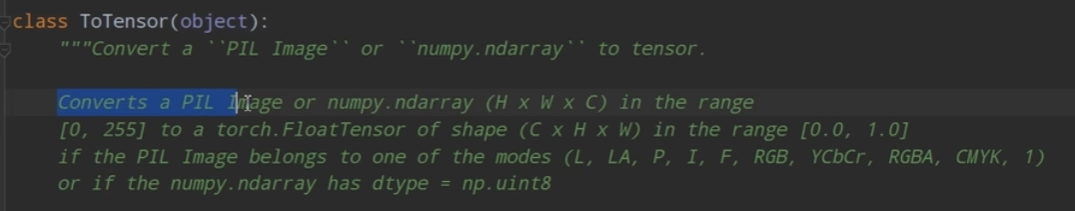
Normalize作用
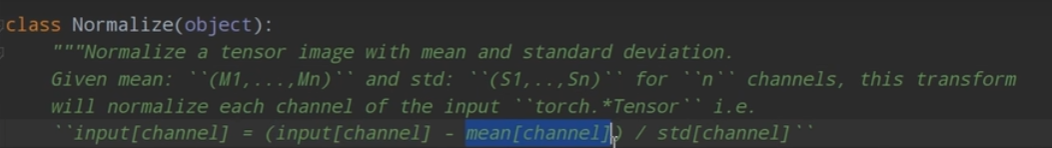

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

第一次设置的时候将download改为True 会在本地文件夹下面下载数据集

In [15]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=False, transform=transform)

每一批次随机拿出36个数据集

In [16]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=36,
                                           shuffle=True, num_workers=0)

In [17]:
# 10000张验证图片
val_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=10000,
                                         shuffle=False, num_workers=0)

迭代器

In [18]:
val_data_iter = iter(val_loader)
val_image, val_label = next(val_data_iter)

index 0==plane 1==car ..

In [19]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

可以看看导入的图像 将size改为较小的数字4 可以看到图像的显示 10000的话无法显示 可以调整为小一点的 进行计算

  cat ship shipplane


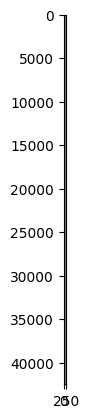

In [20]:
# 将处理的图像返回出去 用来显示 包括大小 各种通道数
def imshow(img):
    img = img / 2 + 0.5  # 反标准化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
print("".join("%5s" % classes[val_label[j]] for j in range(4)))
imshow(torchvision.utils.make_grid(val_image))

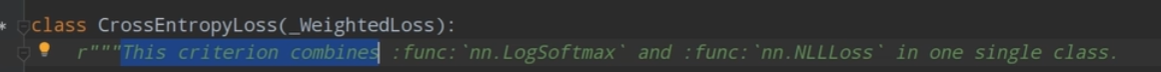

In [11]:
net = LeNet()  # 实例化模型
optimizer = optim.Adam(net.parameters(), lr=0.001)  # 使用Adam优化器
loss_function = nn.CrossEntropyLoss()  # 已经包含了softmax

In [12]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for step, data in enumerate(train_loader, start=0):
        # step返回的就是索引index   get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # 不清除历史梯度 便会对历史梯度进行累加 通过这个特性便可以实现一个很大batch数值的训练
        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if step % 500 == 499:    # print every 500 mini-batches
            with torch.no_grad():   # 接下来的过程中不需要计算损失误差梯度 占用更多的资源 和 占用更多的内存资源
                outputs = net(val_image)  # [batch, 10] 在输出的是个节点中寻找最大的
                predict_y = torch.max(outputs, dim=1)[1]  # 只需要知道输出的标签类别
                accuracy = torch.eq(predict_y, val_label).sum().item() / val_label.size(0)
                print('[%d, %5d] train_loss: %.3f  test_accuracy: %.3f' %
                          (epoch + 1, step + 1, running_loss / 500, accuracy))
                running_loss = 0.0
print('Finished Training')
save_path = './Lenet.pth'
torch.save(net.state_dict(), save_path)



[1,   500] train_loss: 1.720  test_accuracy: 0.443
[1,  1000] train_loss: 1.413  test_accuracy: 0.540
[2,   500] train_loss: 1.171  test_accuracy: 0.571
[2,  1000] train_loss: 1.110  test_accuracy: 0.617
[3,   500] train_loss: 0.976  test_accuracy: 0.646
[3,  1000] train_loss: 0.975  test_accuracy: 0.643
[4,   500] train_loss: 0.871  test_accuracy: 0.667
[4,  1000] train_loss: 0.859  test_accuracy: 0.665
[5,   500] train_loss: 0.778  test_accuracy: 0.679
[5,  1000] train_loss: 0.792  test_accuracy: 0.682
Finished Training


训练好的参数保存在当前路径下的Lenet.pth文件夹里面
后续可以在predict文件夹里面对很多图像进行训练